To quantify the Entanglement between the Atom and the Cavity field over time.

c:\Users\Vedant\miniconda3\envs\qiskit-ok\lib\site-packages\qutip\solver\solver_base.py:598: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(


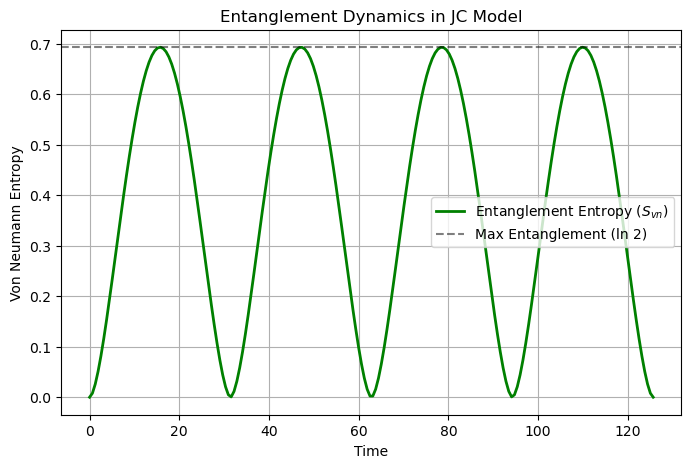

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# --- 1. Reuse Hamiltonian (Standard JC) ---
def build_jc_hamiltonian(N, w_c, w_a, g):
    a  = tensor(destroy(N), qeye(2))
    sm = tensor(qeye(N), sigmam())
    sz = tensor(qeye(N), sigmaz())
    
    H = w_c * a.dag() * a + \
        0.5 * w_a * sz + \
        g * (a.dag() * sm + a * sm.dag())
    return H

# --- Parameters ---
N = 10
w = 1.0
g = 0.05

H = build_jc_hamiltonian(N, w, w, g)

# --- Initial State: Atom Excited, Vacuum Cavity ---
psi0 = tensor(basis(N, 0), basis(2, 0))

# --- Time Evolution ---
# Run for 2 full Rabi cycles to see entropy rise and fall
tlist = np.linspace(0, 4 * np.pi / (2 * g), 200)

# We need the full states to calculate entropy (pass [] for observables)
output = mesolve(H, psi0, tlist, [], [])

# --- Calculate Entanglement Entropy ---
entropies = []

for state in output.states:
    # 1. Trace out the cavity to get the Atom's density matrix
    rho_atom = state.ptrace(1) 
    
    # 2. Calculate Von Neumann Entropy (base e)
    # S = -Tr(rho * ln(rho))
    # QuTiP has a built-in function for this: entropy_vn()
    S = entropy_vn(rho_atom)
    entropies.append(S)

# --- Plotting ---
fig, ax = plt.subplots(figsize=(8, 5))

# Plot Entropy
ax.plot(tlist, entropies, label="Entanglement Entropy ($S_{vn}$)", color="green", lw=2)

# Theoretical Max Entropy for a 2-level system is ln(2) approx 0.693
ax.axhline(y=np.log(2), color='k', linestyle='--', alpha=0.5, label="Max Entanglement (ln 2)")

ax.set_xlabel("Time")
ax.set_ylabel("Von Neumann Entropy")
ax.set_title("Entanglement Dynamics in JC Model")
ax.legend()
ax.grid(True)

plt.show()